# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [1]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [3]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

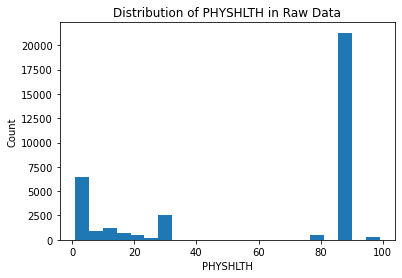

In [4]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [5]:
# Replace None with appropriate text
"""
None
"""

'\nNone\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [6]:
# Your code here
df['PHYSHLTH'] = df['PHYSHLTH'].replace(88, 0)

# Step 2: Explicitly drop invalid values (77, 99, and missing values)
invalid_values = [77, 99]  # Don't know/Not sure and Refused
df = df[~df['PHYSHLTH'].isin(invalid_values)]  # Drop rows with these values
df = df[df['PHYSHLTH'].notna()]  # Drop rows where PHYSHLTH is missing (NaN)

# Step 3: Filter to keep only valid PHYSHLTH values (0-30)
valid_values = range(0, 31) 
df_cleaned = df[df['PHYSHLTH'].isin(valid_values)]

# Display the cleaned DataFrame
df_cleaned.shape

(33747, 358)

Run the code below to ensure you have the correct, cleaned dataframe:

In [7]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [8]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

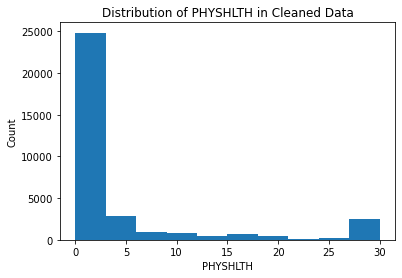

In [9]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [10]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [11]:
# Your code here
state_mapping = {
    36: 'New York',
    34: 'New Jersey',
    9: 'Connecticut'
}

# Replace the numeric codes in the _STATE column with the corresponding state names
df['_STATE'] = df['_STATE'].map(state_mapping)

# Display the updated DataFrame
print(df)

             _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE  \
49938   Connecticut     5.0  5172017       5    17   2017    1200.0   
49939   Connecticut     2.0  2142017       2    14   2017    1200.0   
49940   Connecticut     1.0  1292017       1    29   2017    1200.0   
49941   Connecticut     7.0  9112017       9    11   2017    1200.0   
49942   Connecticut     5.0  7182017       7    18   2017    1200.0   
...             ...     ...      ...     ...   ...    ...       ...   
303774     New York     5.0  5152017       5    15   2017    1200.0   
303775     New York     6.0  6252017       6    25   2017    1200.0   
303776     New York     7.0  7212017       7    21   2017    1200.0   
303777     New York     7.0  7202017       7    20   2017    1200.0   
303778     New York     7.0  7252017       7    25   2017    1200.0   

             SEQNO          _PSU  CTELENM1  ...  _PA300R2  _PA30021  _PASTRNG  \
49938   2017000001  2.017000e+09       NaN  ...       2.0       2.

Below, we check the values:

In [12]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

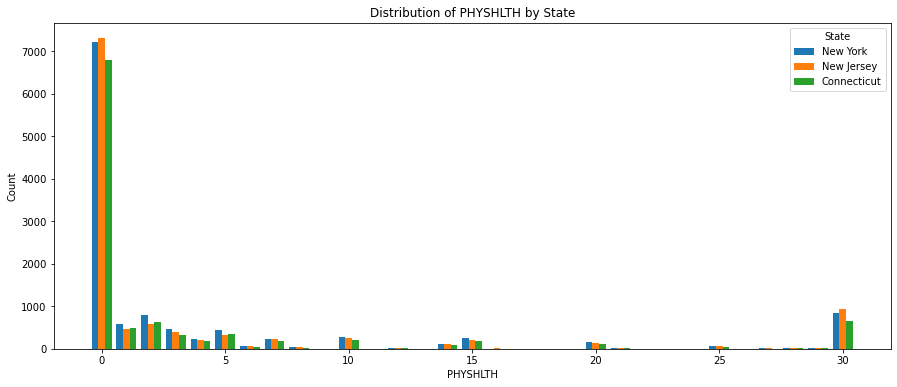

In [13]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [14]:
# Replace None with appropriate text
"""
Yes
"""

'\nYes\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [15]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [16]:
# Replace None with appropriate text
"""
ANOVA Test

PHYSHLTH - Numerical

Connecticut, New Jersey, New York - Categorical
"""

'\nANOVA Test\n\nPHYSHLTH - Numerical\n\nConnecticut, New Jersey, New York - Categorical\n'

Now, identify the null and alternative hypotheses:

In [17]:
# Replace None with appropriate text
"""
Null hypothesis: The mean number of days of bad physical health is the same across all three states.

ALternative hypothesis: At least one state has a different mean number of bad physical health days.
"""

'\nNull hypothesis: The mean number of days of bad physical health is the same across all three states.\n\nALternative hypothesis: At least one state has a different mean number of bad physical health days.\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [18]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [19]:
# Replace None with appropriate text
"""
P value is 8.8e-09 which is < 0.05. We therefore reject the null hypothesis

This means that there is a statistically significant difference in the mean number of days of bad physical health among the three states..

Business Recommendations
Investigate Further:

Understand what health policies, environmental factors, or access to care may differ across states.

Survey or analyze other health behaviors or conditions in each state.

Targeted Interventions:

If a state like New Jersey has worse health outcomes, consider investing in wellness programs or preventative health campaigns there.

Location-Specific Strategies:

Design state-specific approaches rather than a “one-size-fits-all” model for health-related initiatives or marketing.
"""

'\nP value is 8.8e-09 which is < 0.05. We therefore reject the null hypothesis\n\nThis means that there is a statistically significant difference in the mean number of days of bad physical health among the three states..\n\nBusiness Recommendations\nInvestigate Further:\n\nUnderstand what health policies, environmental factors, or access to care may differ across states.\n\nSurvey or analyze other health behaviors or conditions in each state.\n\nTargeted Interventions:\n\nIf a state like New Jersey has worse health outcomes, consider investing in wellness programs or preventative health campaigns there.\n\nLocation-Specific Strategies:\n\nDesign state-specific approaches rather than a “one-size-fits-all” model for health-related initiatives or marketing.\n'

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [20]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [21]:
# Your code here
# Keep only rows where RENTHOM1 is 1 (Own) or 2 (Rent)
df = df[df["RENTHOM1"].isin([1, 2])].copy()  # Add .copy() to create a fresh DataFrame

# Safely replace values using .loc
df.loc[:, "RENTHOM1"] = df["RENTHOM1"].replace({1: "Own", 2: "Rent"})

# Display the cleaned DataFrame
df.shape

(31934, 358)

In [22]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [23]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

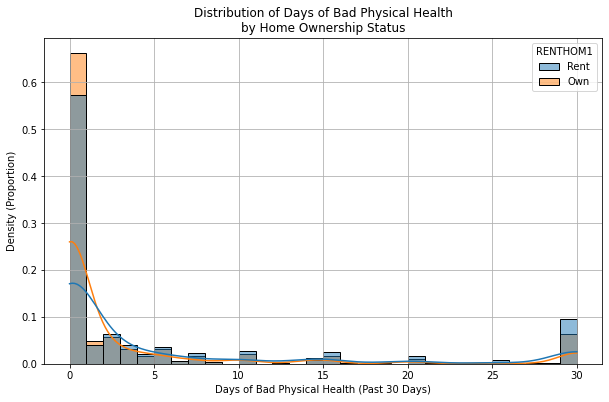

In [24]:
# Your code here
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PHYSHLTH", hue="RENTHOM1", bins=30, kde=True, stat="density", common_norm=False)

# Add titles and labels
plt.title("Distribution of Days of Bad Physical Health\nby Home Ownership Status")
plt.xlabel("Days of Bad Physical Health (Past 30 Days)")
plt.ylabel("Density (Proportion)")
plt.grid(True)
plt.show()

Then run this code to find the averages:

In [25]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [26]:
# Replace None with appropriate text
"""
That’s a noticeable difference of about 1.5 days on average

Renters report more unhealthy days than owners
"""

'\nThat’s a noticeable difference of about 1.5 days on average\n\nRenters report more unhealthy days than owners\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [27]:
# Your code here (create additional cells as needed)
"two-sample t-test - because there are 2 independent variables; ownership and renting"

"Null Hypothesis (H₀): There is no significant difference in the number of unhealthy days between homeowners and renters."
"Alternative Hypothesis (H₁): There is a significant difference in the number of unhealthy days between homeowners and renters."

'Alternative Hypothesis (H₁): There is a significant difference in the number of unhealthy days between homeowners and renters.'

In [28]:
from scipy import stats

# Create two groups: homeowners and renters
homeowners = df[df['RENTHOM1'] == 'Own']['PHYSHLTH']
renters = df[df['RENTHOM1'] == 'Rent']['PHYSHLTH']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(homeowners, renters, equal_var=True)

# Output the result
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: -16.4358
p-value: 0.0000


In [29]:
" Findings: p-value is zero which is < 0.05. Therefore, we reject the null hypothesis. "
"We conclude that there is a significant difference in unhealthy days between homeowners and renters."

'We conclude that there is a significant difference in unhealthy days between homeowners and renters.'

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [30]:
# Your code here

# First, default everyone to 0 (no nicotine use)
df["NICOTINE_USE"] = 0

# Criteria 1: Has smoked 100 cigarettes in their life (SMOKE100 == 1)
df.loc[df["SMOKE100"] == 1, "NICOTINE_USE"] = 1

# Criteria 2: Currently uses chewing tobacco, snuff, or snus (USENOW3 == 1 or 2)
df.loc[df["USENOW3"].isin([1, 2]), "NICOTINE_USE"] = 1

# Criteria 3: Has ever used an e-cigarette (ECIGARET == 1)
df.loc[df["ECIGARET"] == 1, "NICOTINE_USE"] = 1

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [31]:
# Your code here
df['CHRONIC'] = (df['PHYSHLTH'] >= 15).astype(int)

# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0    28246
1     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [32]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


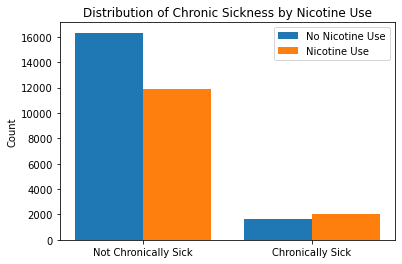

In [33]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [34]:
# Your code here (create additional cells as needed)
"""Chi-Square Test of Independence because we are comparing two categorical variables (nicotine use: yes or no; chronic sickness: yes or no)"""

"""Null Hypothesis (H₀): There is no association between nicotine use and chronic sickness."""
"""Laternative Hypothesis (H₁): There is an association between nicotine use and chronic sickness"""

'Laternative Hypothesis (H₁): There is an association between nicotine use and chronic sickness'

In [35]:
# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 228.22648537455362
P-value: 1.4525226945056695e-51
Degrees of Freedom: 1
Expected Frequencies: 
[[15903.52226467 12342.47773533]
 [ 2076.47773533  1611.52226467]]


Findings:

P-value is less than the significance level (usually 0.05), we reject the null hypothesis, suggesting that there is a significant relationship between nicotine use and chronic sickness

The high chi-square statistic value indicates a larger discrepancy between observed and expected frequencies, strengthening the evidence against the null hypothesis

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [36]:
# Your code here (create additional cells as needed)
# Filter out invalid responses
df_clean = df[df["HLTHPLN1"].isin([1, 2])].copy()

# Map codes to labels
df_clean["HLTHPLN1"] = df_clean["HLTHPLN1"].map({1: "Yes", 2: "No"})

In [37]:
"""Null Hypothesis (H₀): There is no difference in physical health (PHYSHLTH) between people with and without health insurance."""

"""Alternative Hypothesis (H₁): There is a significant difference in physical health (PHYSHLTH) between people with and without health insurance"""

'Alternative Hypothesis (H₁): There is a significant difference in physical health (PHYSHLTH) between people with and without health insurance'

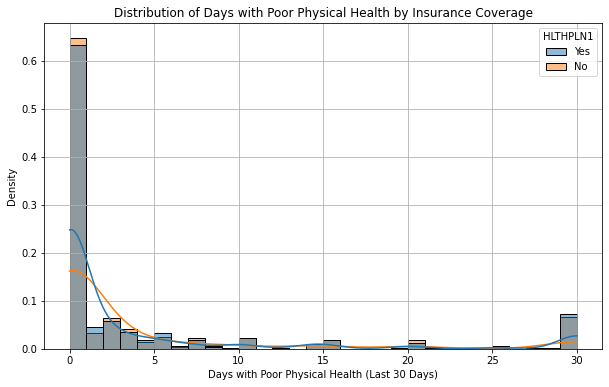

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x="PHYSHLTH", hue="HLTHPLN1", kde=True, stat="density", common_norm=False, bins=30)
plt.title("Distribution of Days with Poor Physical Health by Insurance Coverage")
plt.xlabel("Days with Poor Physical Health (Last 30 Days)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [39]:
from scipy.stats import ttest_ind

# Create two groups
insured = df_clean[df_clean["HLTHPLN1"] == "Yes"]["PHYSHLTH"]
uninsured = df_clean[df_clean["HLTHPLN1"] == "No"]["PHYSHLTH"]

# Perform independent samples t-test
t_stat, p_value = ttest_ind(insured, uninsured, equal_var=False)  # Welch's t-test for unequal variances

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: 1.2680
p-value: 0.2049


Findings:
p > 0.05: Fail to reject the null hypothesis. There is no significant difference observed between people with and without health insurance

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.